# FN model for highly curved tip emitters

$J(F) = A\phi^{-1}F^2(t[y] + \frac{\phi}{eFR} \psi[y])^{-2} \exp(-\frac{B\phi^{3/2}}{F}(\nu [y] + \frac{\phi}{eFR} \omega[y]))$

Here, 

$\omega[y] \approx \frac{4}{5} - \frac{7y^2}{40} - \frac{y^2 \ln[y]}{100}$\
$\psi[y] = \frac{5}{3}y\frac{d\omega}{dy} \approx \frac{4}{3} - \frac{y^2}{500} - \frac{y^2 \ln[y]}{15}$

This equation is valid for tip radii greater than 5nm (in our case we use 200nm, so its fine), for surface fields in the range $3 \cdot 10^{9}$ V/m < F < $10^{10}$ V/m and for work functions in the range $3 eV < \phi < 5 eV$

In case the curvature radii is too large, this equation reduces to the standard FN equation

This calculation is based on Patterson's phD thesis

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:

def J(F, typeOfFN):
    phi = 4.8
    h = 6.582e-16 *1e18
    e = 1
    a = e**3/(8*np.pi*h)
    A = 1.54e-6
    #print(a)
    B = 6.83    
    result = []
    if typeOfFN == 'elemental':
        y = 1.439964*F/phi**2
        ln = np.log(y)
        nu = 1 - y + 1/6*y*ln
        j_corr = A/phi* F**2 * np.exp(-nu*B*phi**(3/2)/F)
        j= A/phi*F**2*np.exp(-B*phi**(3/2)/F)
        result.append(j)
        result.append(j_corr)
    
    if typeOfFN == 'sharp-emitter':
        R = 10
        y = 2*np.sqrt(B*F)/phi
        ln = np.log(y)
        nu = 1 - y**2 + 1/3*y**2 * ln
        #epsilon = 55.263 * 1e15 # e^2 eV^-1 m^-1    
        EF = 0#1.12
        psi = 4/3 - y**2/500 - y**2 * ln/15
        omega = 4/5 - 7*y**2/40 - y**2*ln/100
        t = 1 + 1/9 * y**2 - 1/9 * y**2 * ln
        j = A/phi*F**2*(t + phi/(e*F*R) * psi)**(-2) * 1/np.exp(B*phi**(3/2)/F*(nu + phi/(e*F*R) * omega))


    #print(f'A value is {A}')
    #print(f'B value is {B}')  
    #y = 2*np.sqrt(B*F)/phi
    #print(f'y value is {y}')
    #print(f'ln of y is {ln}')
    #print(f'psi value is {psi}')
    #print(f'omega value is {omega}')
    #B = 8*math.pi np.sqrt(2*m0) / (3*e*h)
    #nu = 1 - y**2 + (1/3 * y**2 * ln)
    #print(f'nu value is {nu}')
    #print(f't value is {t}')
    #print(f'current density is {j}')
    return result

In [109]:
result_1 = J(10000, "elemental")
result_2 = J(10, "sharp-emitter")

print(result_1)
print(result_2)

[np.float64(31.85371672810013), np.float64(22.95785141275135)]
[]


In [110]:
fields = [1, 3, 5, 10]
Fd = np.arange(1, 100, 0.01)
currents = []
for i in range(0,len(Fd)):
    current = J(Fd[i], "elemental")
    currents.append(current)

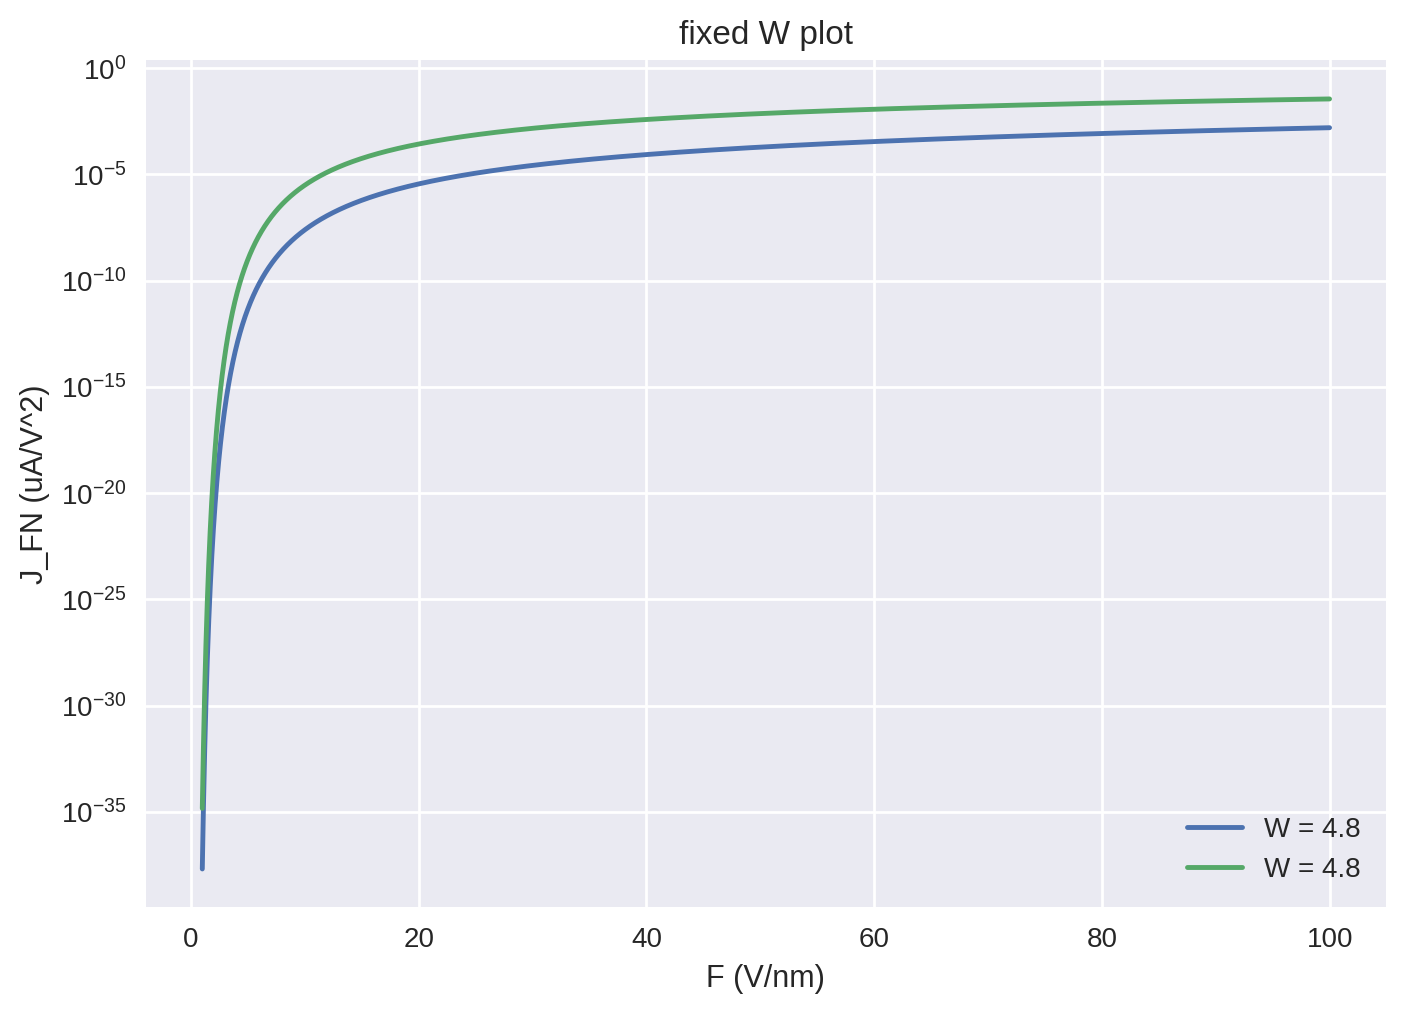

In [111]:
plt.figure(dpi=200)

plt.plot(Fd, currents, label = 'W = 4.8')

#plt.xlim(2, 4)
#plt.ylim(1e-11, 1e-6)
plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()

# Numerical calculation done before

unfortunately I lost the paper on which I based on to make this calculation

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
plt.style.use('seaborn-v0_8')

In [51]:
def J_FN(F,W):
    aFN = 1.541434e-6
    bFN = 6.830890
    result = aFN * F**2/W * np.exp(-bFN * W**(3/2)/F)
    return result

Fd = np.arange(1, 100, 0.1)
Wd = np.arange(0, 30, 0.1)

J_FN_fW1 = J_FN(Fd, 4)
J_FN_fW2 = J_FN(Fd, 4.8)
J_FN_fW3 = J_FN(Fd, 5)
J_FN_fW4 = J_FN(Fd, 10)
J_FN_fW5 = J_FN(Fd, 11.5)
J_FN_fW6 = J_FN(Fd, 12)
J_FN_fW7 = J_FN(Fd, 3)

fields = [1, 3, 5, 10]
currents = []
for i in range(0,len(fields)):
    current = J_FN(fields[i], 4.8)
    currents.append(current)

print(currents)

[np.float64(2.0366685837983389e-38), np.float64(1.1525818120889776e-16), np.float64(4.6245666075341674e-12), np.float64(2.4372908806223462e-08)]


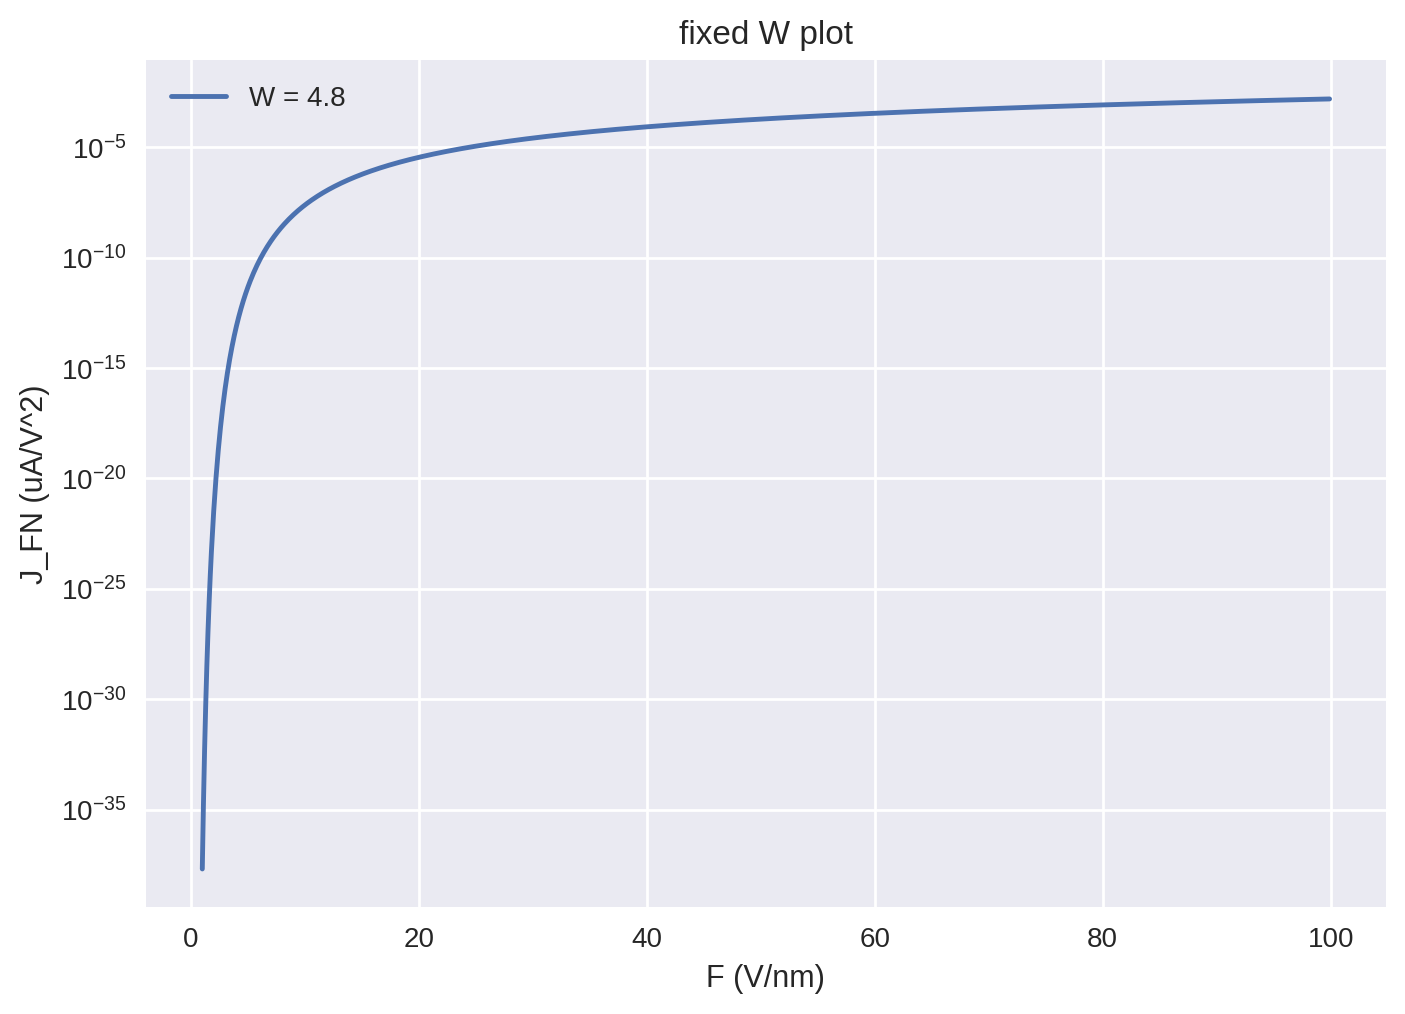

In [53]:
plt.figure(dpi=200)

#plt.plot(Fd, J_FN_fW1, label = 'W = 4')
plt.plot(Fd, J_FN_fW2, label = 'W = 4.8')
#plt.plot(Fd, J_FN_fW3, label = 'W = 5')
#plt.plot(Fd, J_FN_fW4, label = 'W = 10')
#plt.plot(Fd, J_FN_fW7, label = 'W = 3')

#plt.xlim(0, 100)
#plt.ylim(1e-4, 1e2)
plt.yscale("log")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()

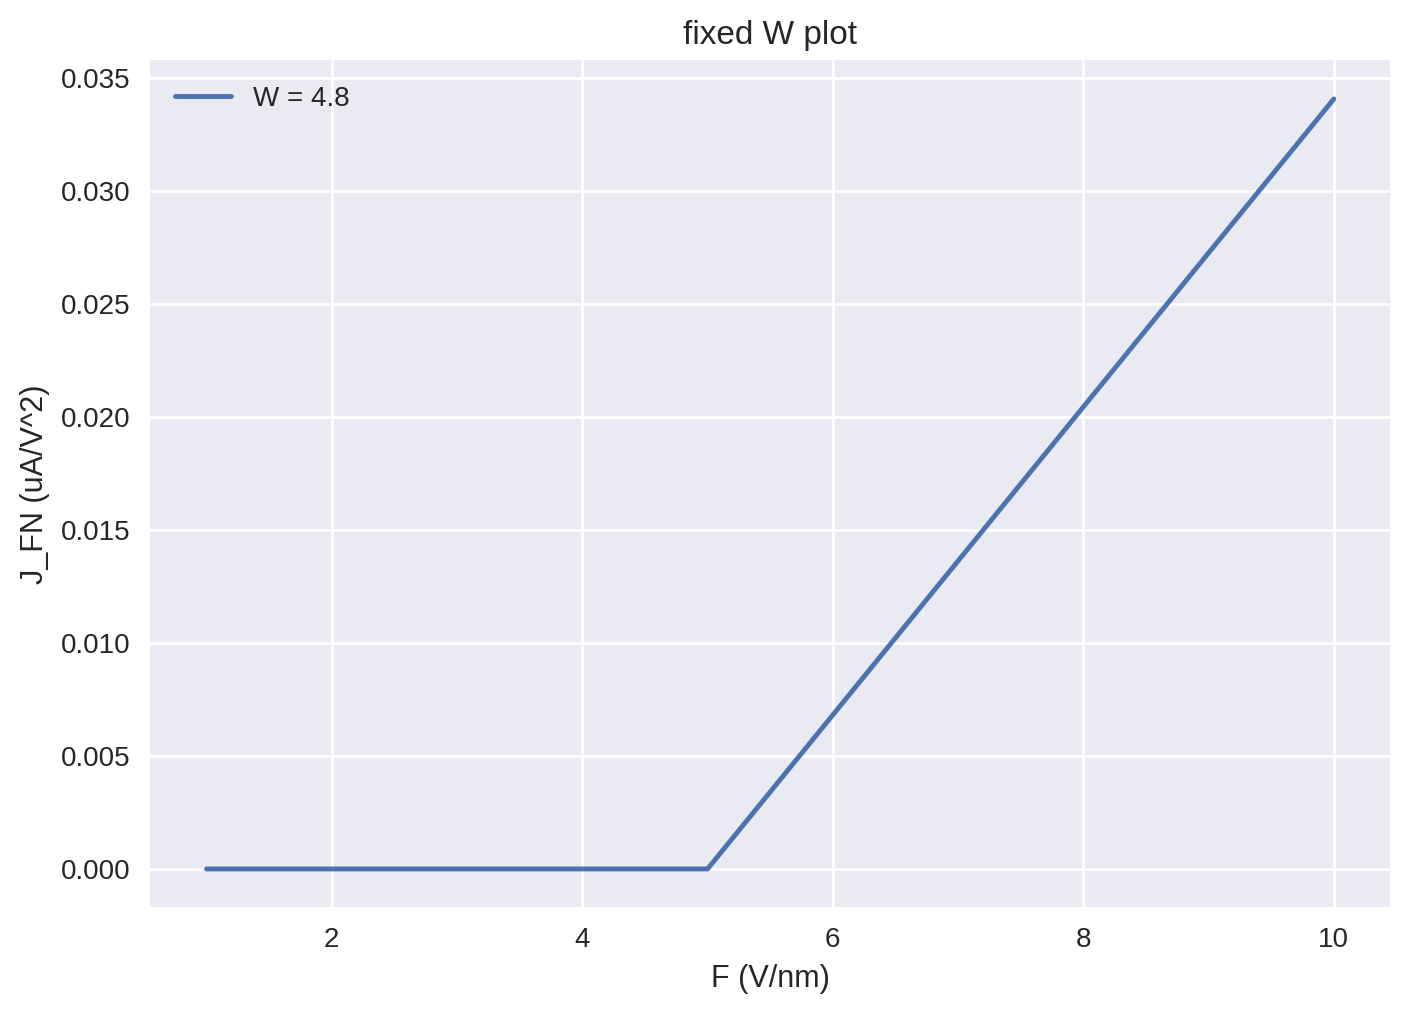

In [86]:
plt.figure(dpi=200)

plt.plot(fields, currents, label = 'W = 4.8')


#plt.xlim(4, 40)
#plt.ylim(0, 0.2)
plt.yscale("linear")

plt.title('fixed W plot')
plt.xlabel('F (V/nm)')
plt.ylabel('J_FN (uA/V^2)')

plt.legend()

plt.show()